In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord, Galactic, Galactocentric
from astropy.coordinates import Angle
import astropy.units as u
import astropy.constants as const

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

Step 1: Read in Gaia/ASPCAP Crossmatch File and isolate specific columns

In [3]:
#This file looks at stars that are all essentially the same distance away from the center of the MW
file_path = '/Users/giovannigollotti/Downloads/SDSS_Files/ASPCAP_Gaia_00311_Crossmatch.csv'

df = pd.read_csv(file_path)

/var/folders/7b/jsrl76yd6v1b3v92fpy66jb00000gn/T/ipykernel_50762/352204248.py:4: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
list(df.columns)

['sdss_id',
 'sdss4_apogee_id',
 'gaia_dr2_source_id',
 'gaia_dr3_source_id',
 'tic_v8_id',
 'healpix',
 'lead',
 'version_id',
 'catalogid',
 'catalogid21',
 'catalogid25',
 'catalogid31',
 'n_associated',
 'n_neighborhood',
 'sdss5_target_flags',
 'sdss4_apogee_target1_flags',
 'sdss4_apogee_target2_flags',
 'sdss4_apogee2_target1_flags',
 'sdss4_apogee2_target2_flags',
 'sdss4_apogee2_target3_flags',
 'sdss4_apogee_member_flags',
 'sdss4_apogee_extra_target_flags',
 'ra_1',
 'dec_1',
 'l_1',
 'b_1',
 'plx',
 'e_plx',
 'pmra_1',
 'e_pmra',
 'pmde',
 'e_pmde',
 'gaia_v_rad',
 'gaia_e_v_rad',
 'g_mag',
 'bp_mag',
 'rp_mag',
 'j_mag',
 'e_j_mag',
 'h_mag',
 'e_h_mag',
 'k_mag',
 'e_k_mag',
 'ph_qual',
 'bl_flg',
 'cc_flg',
 'w1_mag',
 'e_w1_mag',
 'w1_flux',
 'w1_dflux',
 'w1_frac',
 'w2_mag',
 'e_w2_mag',
 'w2_flux',
 'w2_dflux',
 'w2_frac',
 'w1uflags',
 'w2uflags',
 'w1aflags',
 'w2aflags',
 'mag4_5',
 'd4_5m',
 'rms_f4_5',
 'sqf_4_5',
 'mf4_5',
 'csf',
 'zgr_teff',
 'zgr_e_teff',
 '

In [5]:
df_cross_gaia = df[['sdss_id', 'gaia_dr3_source_id', 'healpix', 'catalogid31', 'ra_1', 'dec_1', 'teff', 'logg', 'bp_rp', 'fe_h', 'n_h',
                    'o_h','parallax', 'l_2', 'b_2', 'pm', 'pmra_2', 'pmdec', 'dr2_radial_velocity']]

#l_2 = galactic longitude (determined with Gaia)
#b_2 = galactic latitude (determined with Gaia)

In [6]:
#Deleting rows with np.nan values
df_cross_gaia = df_cross_gaia.dropna()
df_cross_gaia = df_cross_gaia.reset_index(drop=True) #Resetting index values

#Deleting rows where the Gaia DR3 ID == -1
gaia_id = np.array(df_cross_gaia['gaia_dr3_source_id'])
bad_gaia = gaia_id == -1
df_cross_gaia = df_cross_gaia[~bad_gaia]

df_cross_gaia = df_cross_gaia.reset_index(drop=True)

In [7]:
df_cross_gaia[:15] #All the mass values equate to np.nan, which is why we can't include the mass column

,sdss_id,gaia_dr3_source_id,healpix,catalogid31,ra_1,dec_1,teff,logg,bp_rp,fe_h,n_h,o_h,parallax,l_2,b_2,pm,pmra_2,pmdec,dr2_radial_velocity
0,114877950,18305872170309888,88375,63050396551579641,38.796894,5.596680,4919.6875,3.649784,1.113155,-0.428451,-0.486,-0.079161,1.641960,164.266403,-48.768841,46.431534,1.628700,-46.402959,5.771782
1,114877946,18305184975542656,88375,63050396551579627,38.847992,5.589650,6056.3066,4.438146,0.768336,-0.171147,-0.672,-0.280236,3.572811,164.334934,-48.744455,35.129265,-18.284791,-29.995527,11.636775
2,114877964,18308350366843648,88375,63050396551579682,38.863964,5.692591,6014.9100,3.887858,0.748663,-0.096147,-0.044,-0.135236,2.964072,164.262177,-48.652025,30.344755,-7.370606,-29.436004,-9.570927
3,114877081,18102531238471680,88887,63050396551575847,38.879242,5.271588,4757.8190,2.997648,1.243318,0.210549,0.448,0.148839,1.840202,164.659783,-48.982072,10.690163,-1.825898,-10.533075,-11.611487
4,114877962,18307800611028096,88375,63050396551579676,38.955757,5.695669,5620.2060,3.439589,0.780944,-0.104451,0.062,-0.298161,2.230055,164.370863,-48.595533,34.986893,33.420202,-10.352424,21.804190
5,114878130,18338827454939392,87863,63050396551580265,38.960840,5.885618,4767.5757,2.649483,1.240575,-0.020451,0.380,-0.058161,1.073568,164.207523,-48.439328,17.215813,16.318681,-5.484964,28.693666
6,114877061,18099546236637696,88887,63050396551575782,39.061424,5.394395,4856.0530,3.386672,1.201393,0.017549,0.130,0.000839,1.656024,164.770128,-48.775387,21.874280,-11.647756,-18.515236,-24.650982
7,114877011,18087623407428096,88887,63050396551575585,39.153690,5.216049,4893.7130,3.593636,1.119321,-1.430451,-1.247,-1.391161,0.791841,165.043903,-48.863439,24.979483,16.725639,-18.553369,-135.893340
8,114877074,18101161144336128,88887,63050396551575823,39.257620,5.471385,4857.5880,2.464972,1.201082,-0.318451,-0.161,-0.352161,0.960785,164.937748,-48.596978,11.727335,-9.013310,-7.502708,-45.550793
9,114877282,18144828076524800,88376,63050396551576623,39.266880,5.746507,4887.8490,2.473463,1.177738,-0.351451,-0.118,-0.255161,0.762328,164.701071,-48.370776,2.415549,1.756939,1.657722,2.840596


Step 2: Isolate the nitrogen-rich stars with reliable APOGEE abundances (AKA teff > 4500)

In [8]:
#Isolating stars with reliable temperatures
teff = np.array(df_cross_gaia['teff'])
teff_mask = teff > 4500

df_cross_gaia = df_cross_gaia[teff_mask]
df_cross_gaia = df_cross_gaia.reset_index(drop=True)

In [9]:
#Calculating nitrogen abundances
n_abundances = []

for i in range(len(df_cross_gaia['n_h'])):
    n_fe_val = df_cross_gaia['n_h'][i] - df_cross_gaia['fe_h'][i]
    n_abundances.append(n_fe_val)

n_fe_vals = np.array(n_abundances)

In [10]:
#Isolating nitrogen-rich stars
n_abund_mask = n_fe_vals >= 0.5

df_cross_gaia = df_cross_gaia[n_abund_mask]
df_cross_gaia = df_cross_gaia.reset_index(drop=True)

In [11]:
df_cross_gaia[:15]

,sdss_id,gaia_dr3_source_id,healpix,catalogid31,ra_1,dec_1,teff,logg,bp_rp,fe_h,n_h,o_h,parallax,l_2,b_2,pm,pmra_2,pmdec,dr2_radial_velocity
0,114876867,18047864894859136,89400,63050396551574904,39.364098,5.292768,5965.7430,3.904995,0.695686,-0.363451,0.398,-0.218161,1.514129,165.228239,-48.676291,10.255045,-8.348716,-5.955241,-21.060333
1,114876879,18050411810820992,88888,63050396551574951,39.758934,5.145366,6182.1760,3.726177,0.777221,-0.138147,0.746,-0.119236,2.596940,165.836717,-48.555807,8.992499,6.771897,5.916625,-1.922482
2,114877745,18262823713408000,87353,63050396551578779,40.065600,6.111945,6300.0860,4.088621,0.549031,-0.066147,1.063,-0.137236,25.483151,165.323549,-47.601931,49.278454,49.263408,-1.217621,19.025377
3,114843489,6142318629693312,88889,63050396551340305,40.354910,5.367575,6320.5684,3.780285,0.522622,-0.211147,0.863,-0.367236,2.156241,166.338417,-48.017155,25.287859,-9.792759,-23.314753,-16.186728
4,114842717,5947331409684480,89913,63050396551336895,40.378270,4.537912,6212.6494,4.224707,0.631931,-0.108147,1.133,-0.020236,2.388252,167.137705,-48.654791,12.340009,-4.436680,-11.514846,-1.950399
5,114843693,6180874550782720,88378,63050396551341048,40.477040,5.704103,6058.0693,4.196052,0.689712,-0.303147,0.388,-0.664236,3.465944,166.173808,-47.676827,9.962718,-2.427281,-9.662508,-2.125622
6,114843231,6077245580440704,89402,63050396551339120,40.582380,5.171726,6059.8193,4.038924,0.779513,-0.310147,0.190,-0.175236,2.844615,166.785601,-48.031643,40.820793,-12.879004,-38.735880,-23.094463
7,114841854,5738522984255488,90426,63050396551332952,40.859695,4.324028,6167.9740,3.829007,0.683892,0.098853,1.037,-0.074236,1.438452,167.905816,-48.520674,24.634876,23.954051,-5.751566,25.509668
8,114881192,19059312513209856,84794,63050396551593505,40.934300,7.823824,6026.6850,4.557385,0.825994,0.064853,0.646,0.299764,4.137614,164.826442,-45.715759,7.813338,-7.537335,-2.058355,7.810890
9,114842394,5864799318073728,89914,63050396551335398,40.952286,4.794470,6053.7803,4.243310,0.762052,-0.416147,0.290,-0.871236,2.826327,167.568659,-48.096944,8.717671,4.693461,-7.346375,-7.698774


Step 3: Calculate the distance of each star away from the center of the Milky Way

In [11]:
def distance_from_Earth(parallax_list):

    """
        This function returns a list of stellar distances from Earth in kpc, where the distances are the inverse of a specific star's
        parallax. Since parallax has units of milliarcseconds, the distance will initially have units in parsecs. In order to obtain units
        in kiloparsecs, we must divide the distance by 1000.

        Parameters:
            parallax_list (list) = List of parallax values (milliarcsec)

        Returns:
            dist (list) = List of stellar distances from Earth (kiloparsec)
    """

    dist = []
    
    for p in parallax_list:
        d = (1 / (p * 1e-3)) / 1000

        dist.append(d)

    return dist

In [12]:
dist_vals = distance_from_Earth(df_cross_gaia['parallax'])

df_cross_gaia['dist_from_Earth(kpc)'] = dist_vals #Adds distance values to the dataframe

In [13]:
#Mask out distance values less than 0
good_dist = np.array(dist_vals) >= 0
df_cross_gaia = df_cross_gaia[good_dist]
df_cross_gaia = df_cross_gaia.reset_index(drop=True)

df_cross_gaia

,sdss_id,gaia_dr3_source_id,healpix,catalogid31,ra_1,dec_1,teff,logg,bp_rp,fe_h,n_h,o_h,parallax,l_2,b_2,pm,pmra_2,pmdec,dr2_radial_velocity,dist_from_Earth(kpc)
0,114876867,18047864894859136,89400,63050396551574904,39.364098,5.292768,5965.7430,3.904995,0.695686,-0.363451,0.398,-0.218161,1.514129,165.228239,-48.676291,10.255045,-8.348716,-5.955241,-21.060333,0.660446
1,114876879,18050411810820992,88888,63050396551574951,39.758934,5.145366,6182.1760,3.726177,0.777221,-0.138147,0.746,-0.119236,2.596940,165.836717,-48.555807,8.992499,6.771897,5.916625,-1.922482,0.385069
2,114877745,18262823713408000,87353,63050396551578779,40.065600,6.111945,6300.0860,4.088621,0.549031,-0.066147,1.063,-0.137236,25.483151,165.323549,-47.601931,49.278454,49.263408,-1.217621,19.025377,0.039242
3,114843489,6142318629693312,88889,63050396551340305,40.354910,5.367575,6320.5684,3.780285,0.522622,-0.211147,0.863,-0.367236,2.156241,166.338417,-48.017155,25.287859,-9.792759,-23.314753,-16.186728,0.463770
4,114842717,5947331409684480,89913,63050396551336895,40.378270,4.537912,6212.6494,4.224707,0.631931,-0.108147,1.133,-0.020236,2.388252,167.137705,-48.654791,12.340009,-4.436680,-11.514846,-1.950399,0.418716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,114818705,439942090065664,95552,63050396551230163,44.849308,1.364997,6115.7925,3.777392,0.744725,-0.231147,0.488,-0.290236,1.570016,175.334022,-48.052704,1.315554,-0.698750,-1.114643,-34.654488,0.636936
102,114817142,139363098967552,96576,63050396551224512,45.025726,1.110209,6076.8430,3.897285,0.728277,-0.322147,0.364,-0.256236,1.899869,175.790410,-48.107995,11.696977,-11.641076,-1.142190,6.287234,0.526352
103,114817041,121637769567616,96576,63050396551224191,45.238693,0.960671,6221.9950,3.892516,0.661037,-0.462147,0.663,-0.635236,2.353146,176.173672,-48.061622,5.362013,4.857900,2.269799,35.091732,0.424963
104,114817219,153935923508992,96577,63050396551224798,45.787930,0.828412,5912.9155,4.176083,0.812739,-0.116147,0.461,-0.122236,1.714762,176.886649,-47.760458,12.387972,-8.807361,-8.711615,-17.394642,0.583171


In [14]:
#Creating galactic coordinates in order to obtain stellar distance from the center of the Milky Way
dist_MW_vals = []

for i in range(len(df_cross_gaia['dist_from_Earth(kpc)'])):

    #original stellar coordinates
    ra = df_cross_gaia['ra_1'][i] * u.deg
    dec = df_cross_gaia['dec_1'][i] * u.deg
    dist = df_cross_gaia['dist_from_Earth(kpc)'][i] * u.kpc

    #Creating sky coordinates
    star_icrs = SkyCoord(ra = ra, dec = dec, distance = dist, frame = 'icrs')

    # Transform to the Galactocentric frame
    star_galactocentric = star_icrs.transform_to(Galactocentric())

    # Get the X, Y, Z coordinates in parsec
    X = star_galactocentric.cartesian.x
    Y = star_galactocentric.cartesian.y
    Z = star_galactocentric.cartesian.z

    #Find the radial distance of the star from the center of the Milky Way
    R = np.sqrt(np.square(X) + np.square(Y) + np.square(Z))

    #Add stellar radial distance to the list of distances to the center of the Milky Way
    dist_MW_vals.append(R.value)
    

In [15]:
df_cross_gaia['dist_from_center(kpc)'] = dist_MW_vals #Adds radial distance values to the dataframe

df_cross_gaia[:15]

,sdss_id,gaia_dr3_source_id,healpix,catalogid31,ra_1,dec_1,teff,logg,bp_rp,fe_h,...,o_h,parallax,l_2,b_2,pm,pmra_2,pmdec,dr2_radial_velocity,dist_from_Earth(kpc),dist_from_center(kpc)
0,114876867,18047864894859136,89400,63050396551574904,39.364098,5.292768,5965.7430,3.904995,0.695686,-0.363451,...,-0.218161,1.514129,165.228239,-48.676291,10.255045,-8.348716,-5.955241,-21.060333,0.660446,8.558793
1,114876879,18050411810820992,88888,63050396551574951,39.758934,5.145366,6182.1760,3.726177,0.777221,-0.138147,...,-0.119236,2.596940,165.836717,-48.555807,8.992499,6.771897,5.916625,-1.922482,0.385069,8.374334
2,114877745,18262823713408000,87353,63050396551578779,40.065600,6.111945,6300.0860,4.088621,0.549031,-0.066147,...,-0.137236,25.483151,165.323549,-47.601931,49.278454,49.263408,-1.217621,19.025377,0.039242,8.147651
3,114843489,6142318629693312,88889,63050396551340305,40.354910,5.367575,6320.5684,3.780285,0.522622,-0.211147,...,-0.367236,2.156241,166.338417,-48.017155,25.287859,-9.792759,-23.314753,-16.186728,0.463770,8.430812
4,114842717,5947331409684480,89913,63050396551336895,40.378270,4.537912,6212.6494,4.224707,0.631931,-0.108147,...,-0.020236,2.388252,167.137705,-48.654791,12.340009,-4.436680,-11.514846,-1.950399,0.418716,8.397772
5,114843693,6180874550782720,88378,63050396551341048,40.477040,5.704103,6058.0693,4.196052,0.689712,-0.303147,...,-0.664236,3.465944,166.173808,-47.676827,9.962718,-2.427281,-9.662508,-2.125622,0.288522,8.313503
6,114843231,6077245580440704,89402,63050396551339120,40.582380,5.171726,6059.8193,4.038924,0.779513,-0.310147,...,-0.175236,2.844615,166.785601,-48.031643,40.820793,-12.879004,-38.735880,-23.094463,0.351541,8.355120
7,114841854,5738522984255488,90426,63050396551332952,40.859695,4.324028,6167.9740,3.829007,0.683892,0.098853,...,-0.074236,1.438452,167.905816,-48.520674,24.634876,23.954051,-5.751566,25.509668,0.695192,8.588589
8,114881192,19059312513209856,84794,63050396551593505,40.934300,7.823824,6026.6850,4.557385,0.825994,0.064853,...,0.299764,4.137614,164.826442,-45.715759,7.813338,-7.537335,-2.058355,7.810890,0.241685,8.286790
9,114842394,5864799318073728,89914,63050396551335398,40.952286,4.794470,6053.7803,4.243310,0.762052,-0.416147,...,-0.871236,2.826327,167.568659,-48.096944,8.717671,4.693461,-7.346375,-7.698774,0.353816,8.357068


Step 5: Write the Plummer Potential equation and the circular velocity equations

In [16]:
#Plummer potential (works for GCs and dwarf galaxies, NOT spirals)
def plummer_potential(r, b = 15.0, M = 1.29e12): #Claude.ai suggests to use 15 kpc instead
    """
        This function represents the Plummer Potential, which is a potential energy equation that is similar to Kepler's potential except
        that it's also dependent on the half-mass radius of a given galaxy. The Plummer Potential is used as a model for simple 
        Keplerian orbits within a spheroid. For this project, I am specifically modeling the orbits of stars within the Milky Way. Since
        the star's mass is negligibly small compared to the whole mass of the Milky Way, we don't need to include it. This is a simple
        model, because I am assuming the Milky Way's rotation is static and the stars won't interact/collide with other stars.

        Parameters:
            r (float) = Distance of a star from the Milky Way's center (kpc)
            b (float) = The Milky Way's half-mass radius (default for Milky Way = 4.12 kpc - based on Lian et. al 2024)
            M (float) = Mass of the Milky Way (most recent measurement = 1.29e12 solar masses - based on Grand et. al 2019)

        Returns:
            pot (float) = Potential energy of a star orbiting around the Milky Way (m^2/s^2 - energy per mass)
    
    """
    MW_mass = (M * u.solMass).to(u.kg)
    r = (r * u.kpc).to(u.m)
    b = (b * u.kpc).to(u.m)
    
    pot = - (const.G * MW_mass) / np.sqrt(np.square(r) + np.square(b))

    return pot

In [17]:
#Acceleration of the star (derivative of the circular velocity with the plummer potential)
def acceleration_plummer(pos, b = 15.0, M = 1.29e12):
    """
        This function calculates the gravitational acceleration using the Plummer potential. This derivative will be plugged into
        the circular velocity equation, since the circular velocity is dependent on the star's distance from the Milky Way's center
        and the absolute value of the Plummer potential's acceleration in the radial direction.
        
        Plummer acceleration: a = -GM * r / (r^2 + b^2)^(3/2)

        Parameters:
            pos (np.array) = Position vector [x, y, z] (kpc)
            b (float) = The Milky Way's half-mass radius (default for Milky Way = 4.12 kpc - based on Lian et. al 2024)
            M (float) = Mass of the Milky Way (most recent measurement = 1.29e12 solar masses - based on Grand et. al 2019)

        Returns:
            acc (np.array) = Acceleration vector [a_x, a_y, a_z] (m/s^2)
    """
    # Convert to SI units
    MW_mass = (M * u.solMass).to(u.kg).value
    G_val = const.G.to(u.m**3 / (u.kg * u.s**2)).value #Suggested by Claude.ai
    
    pos_m = (pos * u.kpc).to(u.m).value  # Convert position to meters
    b_m = (b * u.kpc).to(u.m).value
    
    # Calculate distance from center
    r = np.sqrt(np.sum(np.square(pos_m)))
    
    # Plummer acceleration
    denominator = (np.square(r) + np.square(b_m))**(3/2)
    acc = -(G_val * MW_mass * pos_m) / denominator
    
    return acc

In [18]:
#Circular velocity method (simple model)
def circular_velocity(r, b = 15.0, M = 1.29e12):
    """
        TThis function returns the circular velocity of a star orbiting the Milky Way, assuming that the Milky Way's rotation is static and
        the star doesn't interact/collide with other stars. This is a SIMPLE model; stars don't actually orbit around the galaxy in a
        perfect circle, since it has velocity components in more than just the radial direction. This equation will test whether my
        leapfrog method works before I model more elliptical orbits.

        Parameters:
            r (float) = Star's distance from the Milky Way's center (kpc)
            b (float) = The Milky Way's half-mass radius (default for Milky Way = 4.12 kpc - based on Lian et. al 2024)
            M (float) = Mass of the Milky Way (most recent measurement = 1.29e12 solar masses - based on Grand et. al 2019)

        Returns:
            v_circ (Quantity) = Star's circular velocity measurement (m/s)
    """
    #Converting into SI units for easy calculations
    MW_mass = (M * u.solMass).to(u.kg).value
    G_val = const.G.to(u.m**3 / (u.kg * u.s**2)).value
    r_m = (r * u.kpc).to(u.m).value
    b_m = (b * u.kpc).to(u.m).value
    
    # For circular orbit in Plummer potential:
    # v_circ = sqrt(GM * r^2 / (r^2 + b^2)^(3/2))
    v_circ = np.sqrt((G_val * MW_mass * np.square(r_m) / ((np.square(r_m) + np.square(b_m))**(3/2))))
    
    return v_circ * (u.m/u.s)

In [19]:
test_circ = circular_velocity(df_cross_gaia['dist_from_center(kpc)'][0])

test_circ = (test_circ).to(u.kpc/u.Myr)

test_circ

<Quantity 0.28727829 kpc / Myr>

Step 6: Implement the Leapfrog method (start with the circular velocity equation)

In [20]:
#Leapfrog method
def leapfrog_method(pos, vel, dt):
    """
         This function performs one integration step for the Leapfrog Method. I'm using the Leapfrog Method, since it conserves energy
        pretty well over long timescales. It's the preferred integrator for orbital simulations. 

        Parameters:
            pos (np.array) = Current position [x, y, z] (kpc)
            vel (np.array) = Current velocity [v_x, v_y, v_z] (m/s)
            dt (float) = Time step (s)

        Returns:
            new_pos (np.array) = New position [x, y, z] (kpc)
            new_vel (np.array) = New velocity [vx, vy, vz] (m/s)
    """
    # Step 1: Half-step velocity update
    acc = acceleration_plummer(pos)
    vel_half = vel + (0.5 * dt * acc)
    
    # Step 2: Full-step position update (convert velocity to kpc/s for position update)
    vel_half_kpc = (vel_half * (u.m/u.s)).to(u.kpc/u.s).value
    new_pos = pos + (dt * vel_half_kpc)
    
    # Step 3: Calculate acceleration at new position
    new_acc = acceleration_plummer(new_pos)
    
    # Step 4: Complete velocity update
    new_vel = vel_half + (0.5 * dt * new_acc)
    
    return new_pos, new_vel

In [21]:
def simulate_orbit(r_0, v_rad, pm, parallax, dt, t_max, b = 4.12, M = 1.29e12):
    """
        This function simulates the orbit of a star around the Milky Way through integrating with the leapfrog method. The number of time
        step (n_steps) is dependent on the given time step (dt) and maximum simulation time (t_max). Every time I iterate the leapfrog
        method, the new times, positions, and velocities will be added to a np.array (times, positions, velocities), which are all
        unitless. This function will return the time, position, and velocity arrays, so they can be easily plotted or animated.

        Parameters:
            r_0 (float) = Initial radial distance away from the center of the Milky Way (kpc)
            v_rad (float) = Velocity in the radial direction (km/s - convert to kpc/Myr)
            pm (float) = Velocity in the tangential direction, which is represented by proper motion (mas/yr - convert to kpc/Myr)
            parallax (float) = Stellar parallax when observed from Earth (microarcsec)
            dt (float) = Time step (Myr)
            t_max (float) = Total simulation time (Myr)
            b (float) = The Milky Way's half-mass radius (default for Milky Way = 4.12 kpc - based on Lian et. al 2024)
            M (float) = Mass of the Milky Way (most recent measurement = 1.29e12 solar masses - based on Grand et. al 2019)
            
        Returns:
            times (np.array) = Array of time steps (Myr)
            positions (np.array) = Array of positions with coordinates [x, y, z] (kpc)
            velocities (np.array) = Array of velocities [v_x, v_y, v_z] (kpc/Myr)
    """
    # Calculate the total number of steps
    n_steps = int(t_max / dt)
    
    # Initialize arrays
    times = np.zeros(n_steps + 1)
    positions = np.zeros((n_steps + 1, 3))  # [x, y, z] in kpc
    velocities = np.zeros((n_steps + 1, 3))  # [v_x, v_y, v_z] in kpc/Myr
    
    # Set initial conditions
    positions[0] = np.array([r_0, 0.0, 0.0])

    #Converting proper motion units to kpc/Myr
    proper_motion = pm * (u.mas/u.yr)
    p = (parallax * u.mas) #Giving units of milliarcsec to parallax
    distance = p.to(u.kpc, equivalencies = u.parallax())
    v_tan = (proper_motion * distance).to(u.kpc/u.Myr, equivalencies = u.dimensionless_angles())

    #Converting radial velocity back to kpc/Myr
    v_r = (v_rad * (u.km/u.s)).to(u.kpc/u.Myr)

    #Adding velocities to an array
    velocities[0] = np.array([v_r.value, v_tan.value, 0.0]) #[x = radial velocity, y = tangential velocity (proper motion)]
    
    # Convert dt from Myr to seconds for leapfrog
    dt_sec = (dt * u.Myr).to(u.s).value
    
    # Integration loop
    for i in range(n_steps):
        times[i + 1] = times[i] + dt
        
        # Get velocity in m/s for leapfrog
        vel_ms = (velocities[i] * (u.kpc/u.Myr)).to(u.m/u.s).value
        
        # Perform leapfrog step
        new_pos, new_vel = leapfrog_method(positions[i], vel_ms, dt_sec)
        
        # Store new values
        positions[i + 1] = new_pos
        velocities[i + 1] = (new_vel * (u.m/u.s)).to(u.kpc/u.Myr).value
    
    return times, positions, velocities

In [50]:
def generate_random_rgb_color():
    """Generates a random RGB color tuple."""
    return (random.uniform(0, 0.4), random.uniform(0.3, 1.0), random.uniform(0.5, 1.0))

In [23]:
def plot_simulation(r0, v_rad, v_tan, p, dt = 0.1, t_max = 500):

    """
        This function simulates the orbit of a star around the Milky Way through integrating with the leapfrog method. The number of time
        step (n_steps) is dependent on the given time step (dt) and maximum simulation time (t_max). Every time I iterate the leapfrog
        method, the new times, positions, and velocities will be added to a np.array (times, positions, velocities), which are all
        unitless. This function will return the time, position, and velocity arrays, so they can be easily plotted or animated.

        Parameters:
            r0 (list) = List of initial radial distances for all the stars in the list (kpc)
            v_rad (list) = List of  radial velocity components (km/s) - will be converted to kpc/Myr
            v_tan (list) = List of  tangential velocity components, representing the proper motion (mas/yr) - will be converted to kpc/Myr
            parallax (list) = List of parallaxes for each star (milliarcsec)
            dt (float) = Time step (Myr)
            t_max (float) = Total simulation time (Myr)

        Variables:
            n_steps (int) = Number of time steps for the simulation (unitless)
            times (np.array) = Array of time steps (Myr)
            positions (np.array) = Array of positions with coordinates [x, y, z] (kpc)
                                   Currently I only care about the radial component, so x will be the only non-zero value
            velocities (np.array) = Array of velocities [v_x, v_y, v_z] (kpc/Myr)
                                    Currently I only care about the radial velocity component, so v_x will be the only non-zero value
            
        Returns:
            Plot with all the circular stellar orbits around the center of the Milky Way
            
    """

    fig = plt.figure(figsize = (8, 6))

    # Orbital trajectory in the xy-plane
    plt.title('Orbital trajectory in xy-plane', fontsize = 15)
    plt.xlabel('x (kpc)', fontsize = 15)
    plt.ylabel('y (kpc)', fontsize = 15)

    plt.scatter(0, 0, color = 'orangered', s = 100, label = 'MW Center')
    
    for i in range(len(r0)):
    
        times, positions, velocities = simulate_orbit(r0[i], v_rad[i], v_tan[i], p[i], dt, t_max)

        rand_color = generate_random_rgb_color()
    
        plt.plot(positions[:, 0], positions[:, 1], color = rand_color, linewidth=1.5, label = f'Orbit for Star {i + 1}') #Orbital model

         # Print diagnostics
        r_values = np.sqrt(np.sum(np.square(positions), axis=1))
        print(f"\n{'='*50}")
        print(f"Info about Star {i + 1}")
        print(f"{'='*50}")
        print(f"Initial distance: {r_values[0]:.3f} kpc")
        print(f"Initial radial velocity: {v_rad[0]} kpc/Myr")
        print(f"Initial tangential velocity: {v_tan[0]} kpc/Myr")
        print(f"Min distance (perihelion): {r_values.min():.3f} kpc")
        print(f"Max distance (apohelion): {r_values.max():.3f} kpc")
        print(f"Final distance: {r_values[-1]:.3f} kpc")
        
    plt.legend(loc = 'upper right', fontsize = 12)
    plt.grid(alpha=0.3)
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()

Step 7: Plot the orbit of a single star, except I'm using the radial velocity instead of the circular velocity this time (still working in 2D)

Radial velocity: -21.060333 km/s
Proper motion: 10.255045 mas/yr
Parallax: 1.514128912695326 mas

Info about Star 1
Initial distance: 8.559 kpc
Initial radial velocity: -21.060333 kpc/Myr
Initial tangential velocity: 10.255045 kpc/Myr
Min distance (perihelion): 0.880 kpc
Max distance (apohelion): 8.583 kpc
Final distance: 6.668 kpc


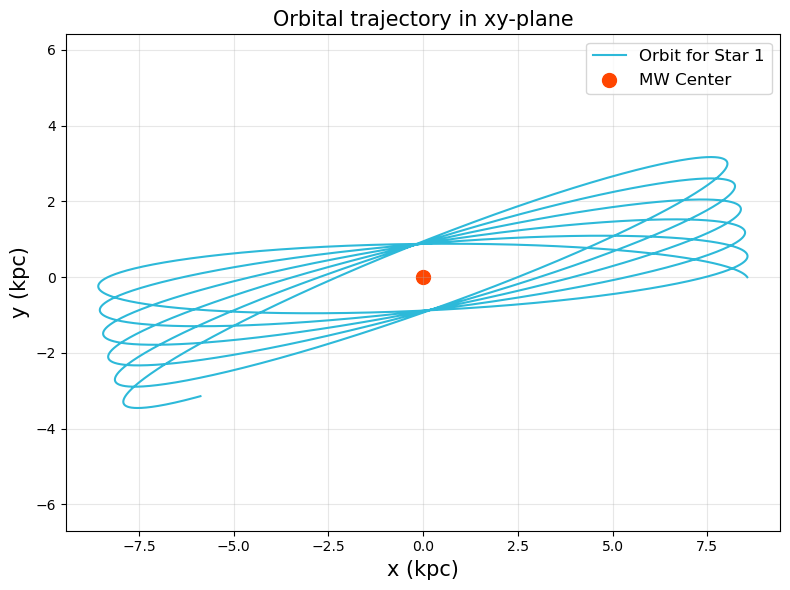

In [24]:
#Plotting one star (the orbit is NOT supposed to look like this)
r0 = [df_cross_gaia['dist_from_center(kpc)'][0]]
rad_vel = [df_cross_gaia['dr2_radial_velocity'][0]]
pm = [df_cross_gaia['pm'][0]]
parallaxes = [df_cross_gaia['parallax'][0]]

print(f"Radial velocity: {rad_vel[0]} km/s")
print(f"Proper motion: {pm[0]} mas/yr")
print(f"Parallax: {parallaxes[0]} mas")

plot_simulation(r0, rad_vel, pm, parallaxes, t_max = 1000) #Tangential velocity >> 

Step 8: Plot the orbits of 3-5 stars (need to download multiple Gaia tables - WIP)

In [25]:
r0 = [df_cross_gaia['dist_from_center(kpc)'][0], df_cross_gaia['dist_from_center(kpc)'][50], df_cross_gaia['dist_from_center(kpc)'][100]]
rad_vel = [df_cross_gaia['dr2_radial_velocity'][0], df_cross_gaia['dr2_radial_velocity'][50], df_cross_gaia['dr2_radial_velocity'][100]]
pm = [df_cross_gaia['pm'][0], df_cross_gaia['pm'][50], df_cross_gaia['pm'][100]]
parallaxes = [df_cross_gaia['parallax'][0], df_cross_gaia['parallax'][50], df_cross_gaia['parallax'][100]]


Info about Star 1
Initial distance: 8.559 kpc
Initial radial velocity: -21.060333 kpc/Myr
Initial tangential velocity: 10.255045 kpc/Myr
Min distance (perihelion): 0.880 kpc
Max distance (apohelion): 8.583 kpc
Final distance: 6.668 kpc

Info about Star 2
Initial distance: 8.448 kpc
Initial radial velocity: -21.060333 kpc/Myr
Initial tangential velocity: 10.255045 kpc/Myr
Min distance (perihelion): 1.236 kpc
Max distance (apohelion): 8.457 kpc
Final distance: 6.283 kpc

Info about Star 3
Initial distance: 8.549 kpc
Initial radial velocity: -21.060333 kpc/Myr
Initial tangential velocity: 10.255045 kpc/Myr
Min distance (perihelion): 1.961 kpc
Max distance (apohelion): 8.605 kpc
Final distance: 7.763 kpc


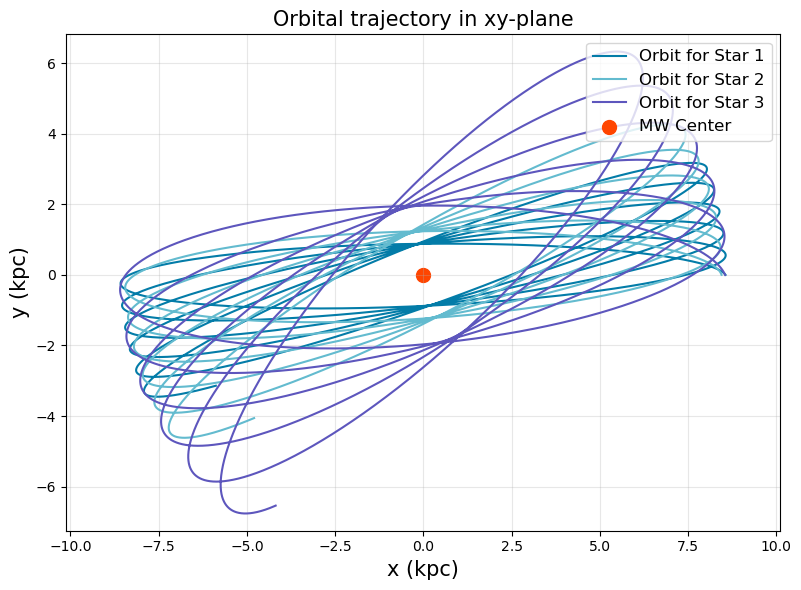

In [26]:
plot_simulation(r0, rad_vel, pm, parallaxes, t_max = 1000) #This plot is wrong - stars are NOT supposed to slingshot around the center

Step 9: Convert everything into Galactocentric coordinates and start working in 3D space

In [27]:
def galactic_coords(ra, dec, dist, pm_ra, pm_dec, rv): #Suggested by Claude.ai
    """
        This function converts observation coordinates to Galactocentric coordinates, so I can simulate stellar orbits in 3 dimensions.

        Parameters:
            ra (float) = RA (degrees)
            dec (float) = Declination (degrees)
            dist (float) = Distance from Earth (kpc)
            pm_ra (float) = Proper motion in RA direction (mas/yr)
            pm_dec (float) = Proper motion in Dec direction (mas/yr)
            rv (float) = Radial velocity (km/s)

        Returns:
            position (np.array): Galactocentric position [X, Y, Z] (kpc)
            velocity (np.array): Galactocentric velocity [vX, vY, vZ] (km/s)
    
    """

    #Create SkyCoords for a star based on observational data (as seen from Earth)
    star = SkyCoord(
            ra = ra * u.deg,
            dec = dec * u.deg,
            distance = dist * u.kpc,
            pm_ra_cosdec = pm_ra * (u.mas/u.yr), #Proper motion * cos(dec)
            pm_dec = pm_dec * (u.mas/u.yr),
            radial_velocity = rv * (u.km/u.s),
            frame = 'icrs'
            )

    #Transforms to the frame of the Milky Way's center
    gal_centric = star.transform_to(Galactocentric())

    #Extracting positional coordinates
    position = np.array([
            gal_centric.x.to(u.kpc).value,
            gal_centric.y.to(u.kpc).value,
            gal_centric.z.to(u.kpc).value
            ])

    #Extract velocities
    velocity = np.array([
            gal_centric.v_x.to(u.km/u.s).value,
            gal_centric.v_y.to(u.km/u.s).value,
            gal_centric.v_z.to(u.km/u.s).value
            ])

    return position, velocity

In [28]:
def simulate_galactic_orbit(r_0, v_0, dt, t_max):

    """
        This function simulates a stellar orbit in Galactocentric coordinates instead of observational coordinates.

        Parameters:
            r_0 (np.array) = Array of initial Galactocentric positions [X, Y, Z] (kpc)
            v_0 (np.array) = Array of initial Galactocentric velocities [vX, vY, vZ] (km/s)
            dt (float) = Time step (Myr)
            t_max (float) = Total simulation time (Myr)

        Returns:
            times (np.array): Array of time steps (Myr)
            positions (np.array): Array of positions [X, Y, Z] (kpc)
            velocities (np.array): Array of velocities [vX, vY, vZ] (kpc/Myr)
    
    """

    # Calculate the total number of steps
    n_steps = int(t_max / dt)
    
    # Initialize arrays
    times = np.zeros(n_steps + 1)
    positions = np.zeros((n_steps + 1, 3))  # [x, y, z] in kpc
    velocities = np.zeros((n_steps + 1, 3))  # [v_x, v_y, v_z] in kpc/Myr
    
    # Set initial conditions
    positions[0] = r_0

    #Converting radial velocity back to kpc/Myr
    velocities[0] = ((v_0 * (u.km/u.s)).to(u.kpc/u.Myr)).value

    #Print initial conditions
    dist_0 = np.sqrt(np.sum(np.square(r_0)))
    v_tot = np.sqrt(np.sum(np.square(v_0)))

    print(f"Initial Galactocentric position: [{r_0[0]:.3f}, {r_0[1]:.3f}, {r_0[2]:.3f}] kpc")
    print(f"Initial distance from Galactic center: {dist_0:.3f} kpc")
    print(f"Initial velocity: [{v_0[0]:.2f}, {v_0[1]:.2f}, {v_0[2]:.2f}] km/s")
    print(f"Total velocity magnitude: {v_tot:.2f} km/s")

    #Calculating circular velocity
    v_circ = (circular_velocity(dist_0).to(u.km/u.s)).value
    print(f"Circular velocity: {v_circ:.2f} km/s\n")
    
    # Convert dt from Myr to seconds for leapfrog
    dt_sec = (dt * u.Myr).to(u.s).value
    
    # Integration loop
    for i in range(n_steps):
        times[i + 1] = times[i] + dt
        
        # Get velocity in m/s for leapfrog
        vel_ms = (velocities[i] * (u.kpc/u.Myr)).to(u.m/u.s).value
        
        # Perform leapfrog step
        new_pos, new_vel = leapfrog_method(positions[i], vel_ms, dt_sec)
        
        # Store new values
        positions[i + 1] = new_pos
        velocities[i + 1] = (new_vel * (u.m/u.s)).to(u.kpc/u.Myr).value
    
    return times, positions, velocities

In [48]:
def plot_galactic_orbit(ra, dec, dist, pm_ra, pm_dec, rv, dt = 0.1, t_max = 1000, disk_radius = 15.0, disk_height = 0.3):

    #Plotting all the orbits on one plot
    fig = plt.figure(figsize = (14, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    #Plotting the Milky Way disk (suggested by Claude.ai)
    
    # 2D disk (circle) for xy-plane plot
    theta = np.linspace(0, 2 * np.pi, 100)
    disk_x = disk_radius * np.cos(theta)
    disk_y = disk_radius * np.sin(theta)
    ax2.plot(disk_x, disk_y, color = 'lightgray', linestyle = '--', linewidth = 2, 
            alpha = 0.5, label = 'MW Disk Edge', zorder = 1)
    ax2.fill(disk_x, disk_y, color = 'lightgray', alpha = 0.2, zorder = 0)
        
    # 3D cylinder for 3D plot
    
    # Create cylinder surface
    theta_cyl = np.linspace(0, 2 * np.pi, 50)
    z_cyl = np.linspace(-disk_height, disk_height, 2)
    Theta_cyl, Z_cyl = np.meshgrid(theta_cyl, z_cyl)
    X_cyl = disk_radius * np.cos(Theta_cyl)
    Y_cyl = disk_radius * np.sin(Theta_cyl)
        
    # Plot cylinder surface
    ax1.plot_surface(X_cyl, Y_cyl, Z_cyl, color = 'lightgray', alpha = 0.2, zorder = 0)
        
    # Plot top and bottom circles of cylinder
    circle_x = disk_radius * np.cos(theta)
    circle_y = disk_radius * np.sin(theta)
    ax1.plot(circle_x, circle_y, disk_height, color = 'gray', linestyle = '--', 
            linewidth = 1.5, alpha = 0.5, zorder = 1)
    ax1.plot(circle_x, circle_y, -disk_height, color = 'gray', linestyle = '--', 
            linewidth = 1.5, alpha = 0.5, zorder = 1)

    #Plotting the Milky Way center
    ax1.scatter(0, 0, 0, color = 'black', s = 100, zorder = 2, label='MW Center')
    ax2.scatter(x = 0, y = 0, color = 'black', s = 100, zorder = 2, label = 'MW Center')
    
    for i in range(len(ra)):

        print(f"Star {i + 1} Info:\n")
    
        print("="*60) #Print functions suggested by Claude.ai for debugging purposes
        print("CONVERTING TO GALACTOCENTRIC COORDINATES")
        print("="*60)
        print(f"Input observational data:")
        print(f"  RA: {ra[i]:.6f} deg")
        print(f"  Dec: {dec[i]:.6f} deg")
        print(f"  Distance from Earth: {dist[i]:.6f} kpc")
        print(f"  PM_RA*cos(dec): {pm_ra[i]:.6f} mas/yr")
        print(f"  PM_Dec: {pm_dec[i]:.6f} mas/yr")
        print(f"  Radial velocity: {rv[i]:.6f} km/s\n")
    
        #Convert to Galactocentric coordinates
        r_0, v_0 = galactic_coords(ra[i], dec[i], dist[i], pm_ra[i], pm_dec[i], rv[i])
    
        #Simulate the orbit
        print("="*60)
        print("SIMULATING ORBIT")
        print("="*60)
    
        times, positions, velocities = simulate_galactic_orbit(r_0, v_0, dt, t_max)
    
        #Determine orbital statistics
        r_vals = np.sqrt(np.sum(np.square(positions), axis = 1))
    
        print("="*60)
        print("ORBITAL STATISTICS")
        print("="*60)
        print(f"Initial distance: {r_vals[0]:.3f} kpc")
        print(f"Min distance (periapsis): {r_vals.min():.3f} kpc")
        print(f"Max distance (apoapsis): {r_vals.max():.3f} kpc")
        print(f"Final distance: {r_vals[-1]:.3f} kpc")
        print(f"Eccentricity (approx): {(r_vals.max() - r_vals.min())/(r_vals.max() + r_vals.min()):.3f}\n")
    
        #Creating 3D plots
    
        rand_color = generate_random_rgb_color()
    
        # 3D orbit
        ax1.plot(positions[:, 0], positions[:, 1], positions[:, 2], 
                color = rand_color, linewidth = 1.5, alpha = 0.7, label = f'Star {i + 1} Orbit', zorder = 3)
        ax1.scatter(positions[0, 0], positions[0, 1], positions[0, 2], color = rand_color, s = 100, marker = '*', zorder = 4, 
                   edgecolors = 'black', linewidths = 1, label = f'Star {i+1} Start')
        ax1.set_xlabel('X (kpc)', fontsize=15)
        ax1.set_ylabel('Y (kpc)', fontsize=15)
        ax1.set_zlabel('Z (kpc)', fontsize=15)
        ax1.set_title('3D Galactocentric Orbit', fontsize = 15)
        ax1.legend(loc = 'upper right', fontsize = 15)
    
        # xy-plane projection
        ax2.plot(positions[:, 0], positions[:, 1], color = rand_color, linewidth = 1.5, alpha = 0.7, label = f'Star {i + 1} Orbit')
        ax2.scatter(positions[0, 0], positions[0, 1], color = rand_color, s = 100, marker = '*', zorder = 4, 
                   edgecolors = 'black', linewidths = 1, label = f'Star {i+1} Start')
        ax2.set_xlabel('X (kpc)', fontsize = 15)
        ax2.set_ylabel('Y (kpc)', fontsize = 15)
        ax2.set_title('Orbit in XY-Plane', fontsize = 15)
        ax2.axis('equal')
        ax2.legend(loc = 'upper right', fontsize = 15)

    plt.tight_layout()
    plt.show()

Star 1 Info:

CONVERTING TO GALACTOCENTRIC COORDINATES
Input observational data:
  RA: 39.364098 deg
  Dec: 5.292768 deg
  Distance from Earth: 0.660446 kpc
  PM_RA*cos(dec): -8.348716 mas/yr
  PM_Dec: -5.955241 mas/yr
  Radial velocity: -21.060333 km/s

SIMULATING ORBIT
Initial Galactocentric position: [-8.545, 0.111, -0.474] kpc
Initial distance from Galactic center: 8.559 kpc
Initial velocity: [51.03, 245.54, 3.28] km/s
Total velocity magnitude: 250.81 km/s
Circular velocity: 280.90 km/s

ORBITAL STATISTICS
Initial distance: 8.559 kpc
Min distance (periapsis): 6.985 kpc
Max distance (apoapsis): 8.986 kpc
Final distance: 8.689 kpc
Eccentricity (approx): 0.125

Star 2 Info:

CONVERTING TO GALACTOCENTRIC COORDINATES
Input observational data:
  RA: 48.679080 deg
  Dec: 7.856545 deg
  Distance from Earth: 0.426811 kpc
  PM_RA*cos(dec): -12.098648 mas/yr
  PM_Dec: -18.710504 mas/yr
  Radial velocity: -13.194032 km/s

SIMULATING ORBIT
Initial Galactocentric position: [-8.444, 0.040, -0.257

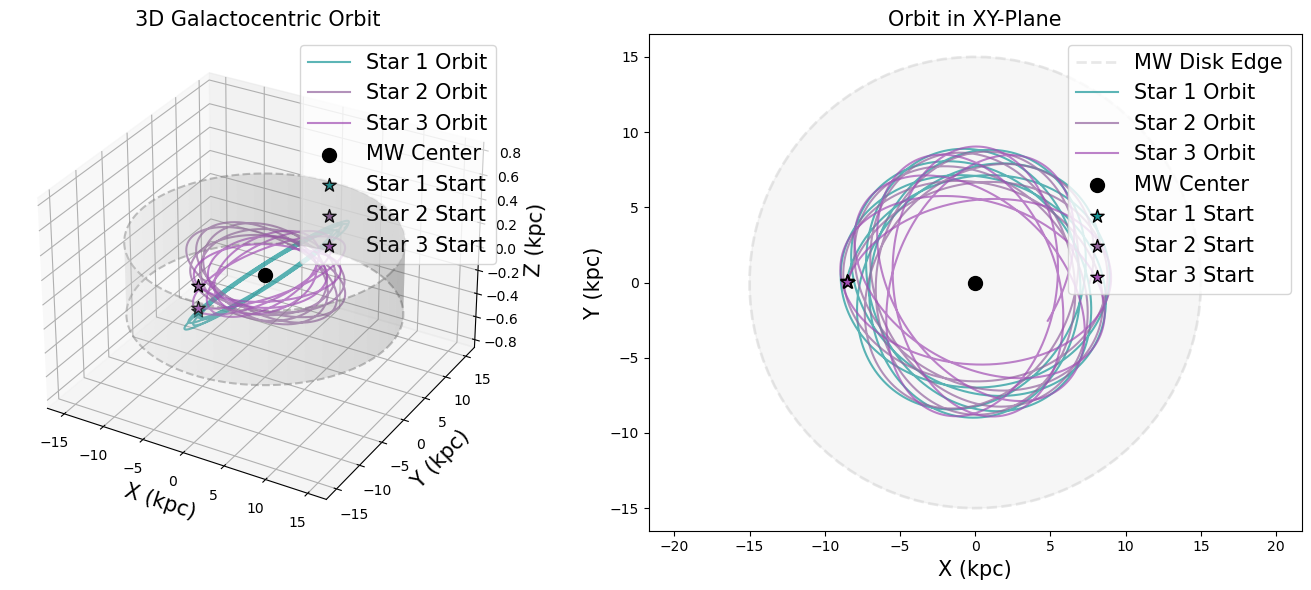

In [49]:
ra = [df_cross_gaia['ra_1'][0], df_cross_gaia['ra_1'][50], df_cross_gaia['ra_1'][100]]
dec = [df_cross_gaia['dec_1'][0], df_cross_gaia['dec_1'][50], df_cross_gaia['dec_1'][100]]
dist = [df_cross_gaia['dist_from_Earth(kpc)'][0], df_cross_gaia['dist_from_Earth(kpc)'][50], df_cross_gaia['dist_from_Earth(kpc)'][100]]
pm_ra = [df_cross_gaia['pmra_2'][0], df_cross_gaia['pmra_2'][50], df_cross_gaia['pmra_2'][100]]
pm_dec = [df_cross_gaia['pmdec'][0], df_cross_gaia['pmdec'][50], df_cross_gaia['pmdec'][100]]
rv = [df_cross_gaia['dr2_radial_velocity'][0], df_cross_gaia['dr2_radial_velocity'][50], df_cross_gaia['dr2_radial_velocity'][100]]

plot_galactic_orbit(ra, dec, dist, pm_ra, pm_dec, rv)

Step 10: Make an animation of the orbits

In [71]:
def init():
    """ Initialize animation """
    
    for i in range(len(ra)):
            
        #3D arrays
        points_3d[i].set_data([], [])
        points_3d[i].set_3d_properties([])
        trails_3d[i].set_data([], [])
        trails_3d[i].set_3d_properties([])

        #2D arrays
        points_2d[i].set_data([], [])
        trails_2d[i].set_data([], [])
            
    time_text_3d.set_text('')
    time_text_2d.set_text('')

    return points_3d + trails_3d + points_2d + trails_2d +[time_text_3d, time_text_2d]

In [72]:
def animate(frame): #Created with Claude.ai
    """Update animation for each frame"""

    idx = frame * speed
    if idx >= len(all_positions[0]):
        idx = len(all_positions[0]) - 1
        
    # Calculate time
    current_time = idx * dt
        
    for i in range(len(ra)):
        # Get current position
        pos = all_positions[i][idx]
            
        # Get trail positions
        trail_start = max(0, idx - trail_length)
        trail_pos = all_positions[i][trail_start:idx+1]
            
        # Update 3D plot
        points_3d[i].set_data([pos[0]], [pos[1]])
        points_3d[i].set_3d_properties([pos[2]])
            
        if len(trail_pos) > 1:
            trails_3d[i].set_data(trail_pos[:, 0], trail_pos[:, 1])
            trails_3d[i].set_3d_properties(trail_pos[:, 2])
            
        # Update 2D plot
        points_2d[i].set_data([pos[0]], [pos[1]])
            
        if len(trail_pos) > 1:
            trails_2d[i].set_data(trail_pos[:, 0], trail_pos[:, 1])
        
    # Update time display
    time_text_3d.set_text(f'Time: {current_time:.1f} Myr')
    time_text_2d.set_text(f'Time: {current_time:.1f} Myr')
        
    return points_3d + trails_3d + points_2d + trails_2d + [time_text_3d, time_text_2d]

In [75]:
def animate_galactic_orbit(ra, dec, dist, pm_ra, pm_dec, rv, dt = 0.1, t_max = 1000, disk_radius = 15.0, disk_height = 0.3,
                          speed = 10, trail_length = 50, save_animation = False, gif_name = 'Nrich_stellar_orbits.gif'):

    # Store all star data
    all_positions = []
    all_velocities = []
    all_colors = []

    for i in range(len(ra)):
        print(f"\nProcessing Star {i + 1}...")
        print("="*60)
        
        # Convert to Galactocentric coordinates
        r_0, v_0 = galactic_coords(ra[i], dec[i], dist[i], pm_ra[i], pm_dec[i], rv[i])
        
        # Simulate the orbit
        times, positions, velocities = simulate_galactic_orbit(r_0, v_0, dt, t_max)
        
        all_positions.append(positions)
        all_velocities.append(velocities)
        all_colors.append((random.random(), random.random(), random.random()))
        
        # Print statistics
        #r_vals = np.sqrt(np.sum(np.square(positions), axis=1))
        #print(f"Star {i+1} - Distance range: {r_vals.min():.2f} to {r_vals.max():.2f} kpc")

    #Plotting all the orbits on one plot
    fig = plt.figure(figsize = (14, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    #Plotting the Milky Way's disk
    # 2D disk (circle) for xy-plane plot
    theta = np.linspace(0, 2 * np.pi, 100)
    disk_x = disk_radius * np.cos(theta)
    disk_y = disk_radius * np.sin(theta)
    ax2.plot(disk_x, disk_y, color = 'lightgray', linestyle = '--', linewidth = 2, 
            alpha = 0.5, label = 'MW Disk Edge', zorder = 1)
    ax2.fill(disk_x, disk_y, color = 'lightgray', alpha = 0.2, zorder = 0)
        
    # 3D cylinder for 3D plot
    
    # Create cylinder surface
    theta_cyl = np.linspace(0, 2 * np.pi, 50)
    z_cyl = np.linspace(-disk_height, disk_height, 2)
    Theta_cyl, Z_cyl = np.meshgrid(theta_cyl, z_cyl)
    X_cyl = disk_radius * np.cos(Theta_cyl)
    Y_cyl = disk_radius * np.sin(Theta_cyl)
        
    # Plot cylinder surface
    ax1.plot_surface(X_cyl, Y_cyl, Z_cyl, color = 'lightgray', alpha = 0.2, zorder = 0)
        
    # Plot top and bottom circles of cylinder
    circle_x = disk_radius * np.cos(theta)
    circle_y = disk_radius * np.sin(theta)
    ax1.plot(circle_x, circle_y, disk_height, color = 'gray', linestyle = '--', 
            linewidth = 1.5, alpha = 0.5, zorder = 1)
    ax1.plot(circle_x, circle_y, -disk_height, color = 'gray', linestyle = '--', 
            linewidth = 1.5, alpha = 0.5, zorder = 1)

    #Plotting the Milky Way center
    ax1.scatter(0, 0, 0, color = 'black', s = 100, zorder = 2, label='MW Center')
    ax2.scatter(x = 0, y = 0, color = 'black', s = 100, zorder = 2, label = 'MW Center')

    # Initialize plot elements for each star
    points_3d = []
    trails_3d = []
    
    points_2d = []
    trails_2d = []

    for i in range(len(ra)):
        
        # 3D elements
        point_3d, = ax1.plot([], [], [], marker = '*', color = all_colors[i], 
                            markersize = 12, zorder = 4, markeredgecolor = 'black', 
                            markeredgewidth = 0.5, label = f'Star {i+1}')
        trail_3d, = ax1.plot([], [], [], linestyle = '-', color = all_colors[i], 
                            linewidth = 2, alpha = 0.6, zorder = 3)
        points_3d.append(point_3d)
        trails_3d.append(trail_3d)
        
        # 2D elements
        point_2d, = ax2.plot([], [], marker = '*', color = all_colors[i], 
                            markersize = 12, zorder = 4, markeredgecolor = 'black',
                            markeredgewidth = 0.5, label = f'Star {i+1}')
        trail_2d, = ax2.plot([], [], linestyle = '-', color = all_colors[i], 
                            linewidth = 2, alpha = 0.6, zorder = 3)
        points_2d.append(point_2d)
        trails_2d.append(trail_2d)

        # Time text (suggested by Claude.ai)
        time_text_3d = ax1.text2D(0.02, 0.95, '', transform = ax1.transAxes, 
                              fontsize = 12, fontweight = 'bold',
                              bbox=dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.8))
        time_text_2d = ax2.text(0.02, 0.98, '', transform = ax2.transAxes,
                           fontsize = 12, fontweight = 'bold', verticalalignment = 'top',
                           bbox=dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.8))

        
        # 3D orbit
        ax1.plot(positions[:, 0], positions[:, 1], positions[:, 2], 
                color = all_colors[i], linewidth = 1.5, alpha = 0.7, label = f'Star {i + 1} Orbit', zorder = 3)
        ax1.scatter(positions[0, 0], positions[0, 1], positions[0, 2], color = all_colors[i], s = 100, marker = '*', zorder = 4, 
                   edgecolors = 'black', linewidths = 1, label = f'Star {i+1} Start')
        ax1.set_xlabel('X (kpc)', fontsize=15)
        ax1.set_ylabel('Y (kpc)', fontsize=15)
        ax1.set_zlabel('Z (kpc)', fontsize=15)
        ax1.set_title('3D Galactocentric Orbit', fontsize = 15)
        ax1.legend(loc = 'upper right', fontsize = 15)

        max_range = disk_radius * 1.1
        ax1.set_xlim([-max_range, max_range])
        ax1.set_ylim([-max_range, max_range])
        ax1.set_zlim([-max_range, max_range])
    
        # xy-plane projection
        ax2.plot(positions[:, 0], positions[:, 1], color = all_colors[i], linewidth = 1.5, alpha = 0.7, label = f'Star {i + 1} Orbit')
        ax2.scatter(positions[0, 0], positions[0, 1], color = all_colors[i], s = 100, marker = '*', zorder = 4, 
                   edgecolors = 'black', linewidths = 1, label = f'Star {i+1} Start')
        ax2.set_xlabel('X (kpc)', fontsize = 15)
        ax2.set_ylabel('Y (kpc)', fontsize = 15)
        ax2.set_title('Orbit in XY-Plane', fontsize = 15)
        ax2.axis('equal')
        ax2.legend(loc = 'upper right', fontsize = 15)

        ax2.set_xlim([-max_range, max_range])
        ax2.set_ylim([-max_range, max_range])

    #Calculate number of frames
    n_frames = len(all_positions[0]) // speed #Total number of frames must be an integer value
    
    # Create animation
    print(f"\nCreating animation with {n_frames} frames...")
    
    anim = FuncAnimation(fig, animate, init_func = init, frames = n_frames,
                        interval = 50, blit = True, repeat = True)    

    # Save animation if requested
    if save_animation == True:
        print(f"Saving animation to {filename}...")
        anim.save(filename, writer='pillow', fps = 10, dpi = 100)
        print("Animation saved!")

    plt.tight_layout()
    plt.show()

    return anim


Processing Star 1...
Initial Galactocentric position: [-8.545, 0.111, -0.474] kpc
Initial distance from Galactic center: 8.559 kpc
Initial velocity: [51.03, 245.54, 3.28] km/s
Total velocity magnitude: 250.81 km/s
Circular velocity: 280.90 km/s


Processing Star 2...
Initial Galactocentric position: [-8.444, 0.040, -0.257] kpc
Initial distance from Galactic center: 8.448 kpc
Initial velocity: [50.43, 232.58, -17.29] km/s
Total velocity magnitude: 238.61 km/s
Circular velocity: 278.57 km/s


Processing Star 3...
Initial Galactocentric position: [-8.537, 0.035, -0.442] kpc
Initial distance from Galactic center: 8.549 kpc
Initial velocity: [72.73, 198.15, -7.56] km/s
Total velocity magnitude: 211.21 km/s
Circular velocity: 280.69 km/s


Creating animation with 1000 frames...


NameError: name 'points_3d' is not defined

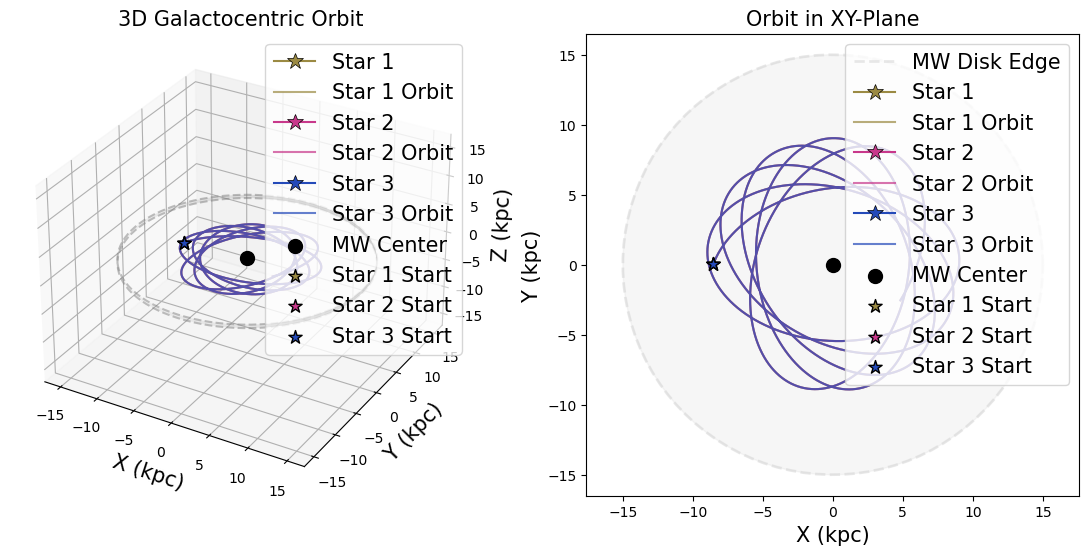

In [76]:
anim = animate_galactic_orbit(ra, dec, dist, pm_ra, pm_dec, rv)

anim

In [13]:
len(df_cross_gaia['ra_1'])

109